In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12

from matplotlib.ticker import LogLocator
from scipy.optimize import curve_fit
from sympy import symbols, simplify, diff, lambdify, exp

%matplotlib widget

In [2]:
def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [3]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.726 #K

In [4]:
I0 =(2*K**3*T**3)/(vc**2*h_pl**2)*1e26

In [5]:
I0  #--> it should be 270 Mjy sr-1 for T0 =2.725

270211565.4196308

In [6]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * I0 #intensity not occupation number
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.45614425920673529191-1.0/x) 

Jref= lambda x:  np.exp(-(x/1.98e+6)**(5/2)) 


1) chosmotherm: heating vs ck4, 5e5 and 2e6 (Done)
2) fit a mu distortion to this --> Jbb comparison (Done)
3) check I0 (t0 is wrong) compare to cuso notes + more digits to alpha (Done)
4) mu_num < mu_dc

In [7]:
#zh = 5e5 heating 
folder = 'outputs/check-cosmotherm-mu/5e5-heating/PDE-non-linear/Greens/'

file_path = os.path.join(folder, "Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
nu_5e5h = HC.iloc[:, 1].values    #frequency in Ghz
x_5e5h = HC.iloc[:, 0].values    #frequency in Ghz
DI_N_5e5h = (HC.iloc[:, 5].values)


op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_5e5h= op.iat[0,1]
mu_5e5h = 1.401e-5 * Jbb_5e5h

In [8]:
print("The numerical mu is: ",1.401e-5 *Jbb_5e5h,"\n");
print("The analytical mu is: ",1.401e-5 *Jref(5e5),"\n");

The numerical mu is:  1.3369426820654548e-05 

The analytical mu is:  1.3568164872408511e-05 



In [9]:
#zh = 5e5 ck4
folder = 'outputs/check-cosmotherm-mu/5e5-ck4/PDE-non-linear/Greens/'

file_path = os.path.join(folder, "Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x_5e5c = HC.iloc[:, 1].values
DI_N_5e5c = (HC.iloc[:, 5].values)

op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_5e5c= op.iat[0,1]


In [10]:
#zh=2e6 heating
folder = 'outputs/check-cosmotherm-mu/2e6-heating/PDE-non-linear/Greens/'

file_path = os.path.join(folder, "Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
nu_2e6h = HC.iloc[:, 1].values
x_2e6h =  HC.iloc[:, 0].values
DI_N_2e6h = (HC.iloc[:, 5].values)

op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_2e6h= op.iat[0,1]
mu_2e6h = 1.401e-5 * Jbb_2e6h

In [11]:
print("The numerical mu is: ",1.401e-5 *Jbb_2e6h,"\n");
print("The analytical mu is: ",1.401e-5 *Jref(2e6),"\n");


The numerical mu is:  4.713974584403647e-06 

The analytical mu is:  5.024506330470892e-06 



In [12]:
folder = 'outputs/check-cosmotherm-mu/2e6-ck4/PDE-non-linear/Greens/'

file_path = os.path.join(folder, "Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x_2e6c = HC.iloc[:, 1].values
DI_N_2e6c = (HC.iloc[:, 5].values)

op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb_2e6c= op.iat[0,1]

### Compare the Case with heating and CK4 for CosmoTherm results

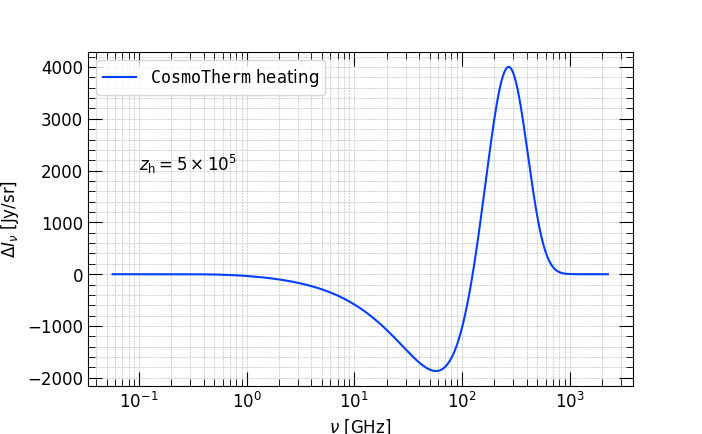

In [13]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x,M(x)*mu*1e26, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

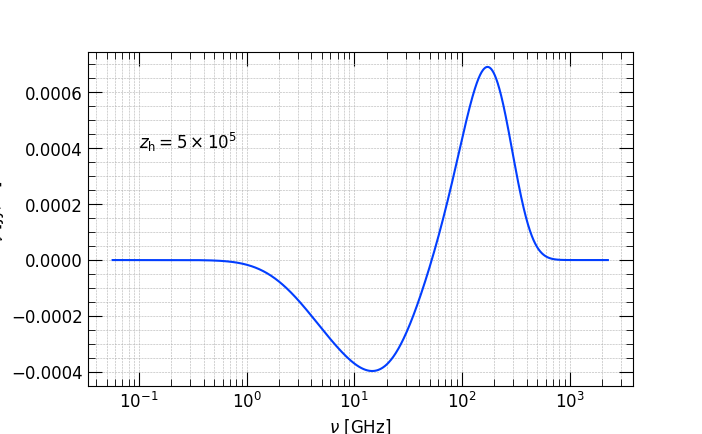

In [14]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_5e5h,DI_N_5e5h-DI_N_5e5c, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x,M(x)*mu*1e26, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,4e-4, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

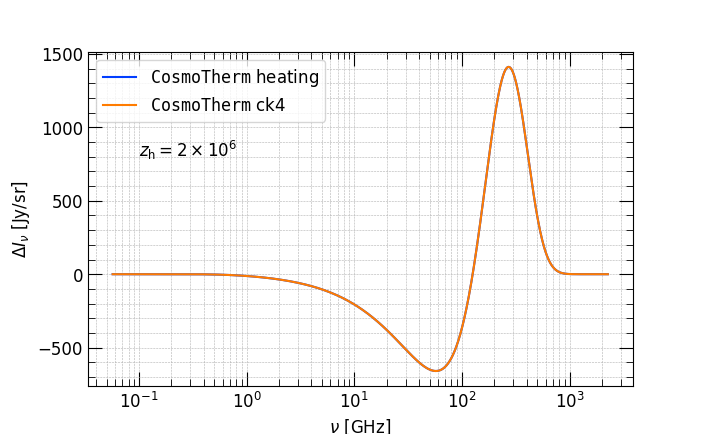

In [15]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_2e6h,DI_N_2e6h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
ax1.plot(x_2e6c,DI_N_2e6c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x,M(x)*mu*1e26, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,800, "$z_{\\rm h} = 2 \\times 10^6$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

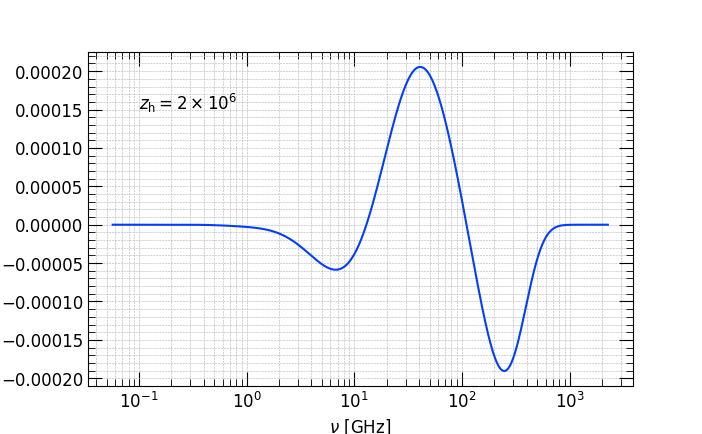

In [16]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_2e6h,DI_N_2e6h-DI_N_2e6c, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x,M(x)*mu*1e26, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,1.5e-4, "$z_{\\rm h} = 2 \\times 10^6$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

Not a significant difference, relative difference of 1e-8, probably numerical

### Compare the $\mu$ distortion with CosmoTherm

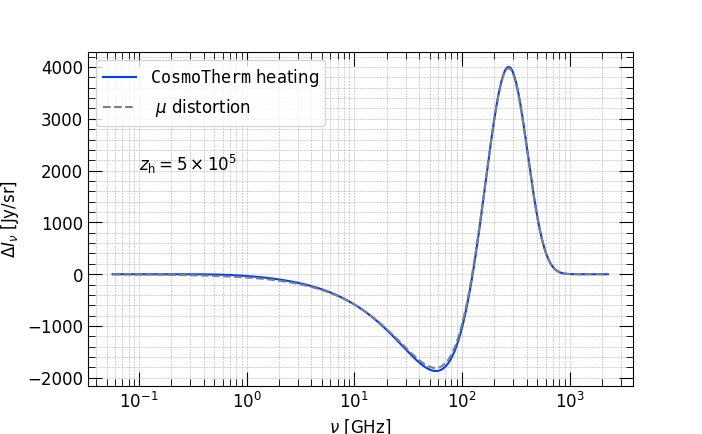

In [17]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

ax1.plot(nu_5e5h,M(x_5e5h)*mu_5e5h, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

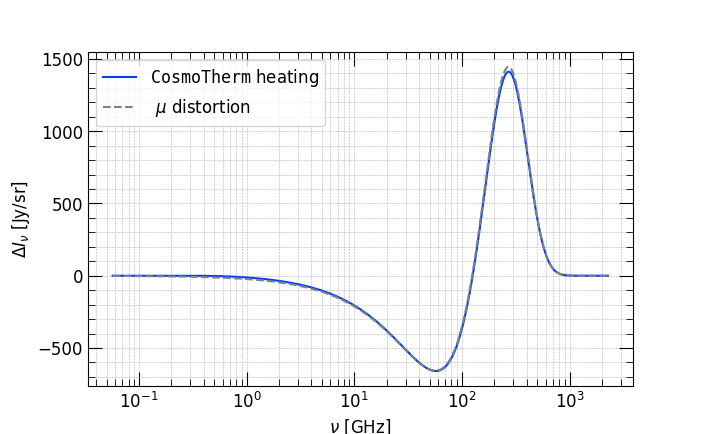

In [18]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_2e6h,DI_N_2e6h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

ax1.plot(nu_2e6h,M(x_2e6h)*mu_2e6h*1.03, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 2 \\times 10^6$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

# Try to find the mu distortion which fit the plot

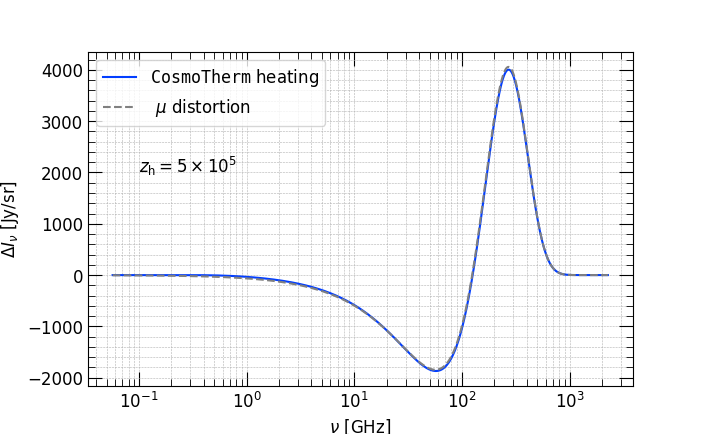

In [19]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(nu_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

ax1.plot(nu_5e5h,M(x_5e5h)*mu_5e5h*1.02, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [20]:
#colors1=sns.color_palette("bright",2) 
#fig, ax1= plt.subplots( figsize=set_size(width))
##fig.suptitle(f"Approximation whitout the temperature shift ")
#
#
#ax1.plot(x_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5h2,DI_N_5e5h2, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])
#
##ax1.plot(nu_5e5h,M(x_5e5h)*mu_5e5h, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")
#
#
#ax1.set_xscale('log')
#ax1.set_xlim([1e-3, 1e2])
##ax1.set_ylim([1e-2, 1e2])
#
#plt.minorticks_on()
#plt.tick_params(direction='in',right=True, top=True)
#plt.tick_params(labelsize=12)
#plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
#plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
#plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
#
#ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
#
#ax1.set_xlabel("$\\nu$ [GHz]")
##ax1.set_xlabel("x")
##ax1.set_title("All $\Delta$ I_N curves")
##ax1.text(1e-1,2000, "$z_{\\rm h} = 5 \\times 10^5$")
#ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
#ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)
#
##plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
#plt.show()

### Try to do a fit

In [21]:
mu_5e5h

1.3369426820654548e-05

In [22]:
def func(x,a,b,c):
    return a*G(x)+b*Y(x)+c*M(x)

popt, pcov = curve_fit(func,x_5e5h,DI_N_5e5h)

In [23]:
print(" DI = ",popt[0],"G(x) + ",popt[1],"Y(x) + ",popt[2],"M(x)")

 DI =  -5.959863903405972e-08 G(x) +  1.630246102005637e-09 Y(x) +  1.368918167181277e-05 M(x)


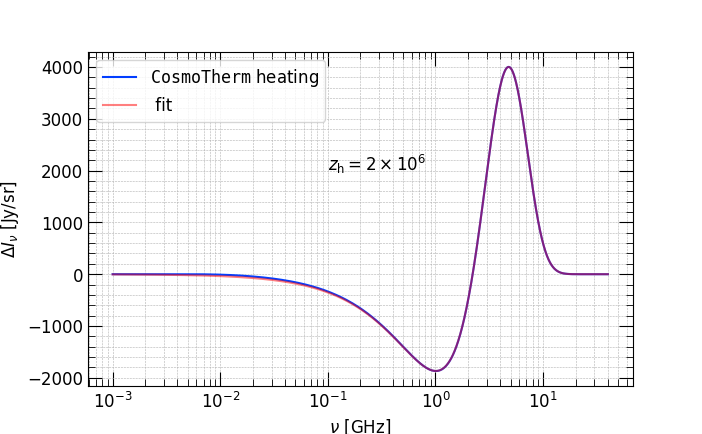

In [24]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(x_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x_5e5h,M(x_5e5h)*mu_5e5h, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")
ax1.plot(x_5e5h,func(x_5e5h,popt[0],popt[1],popt[2]), label = " fit", color = "red",alpha=0.5)


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 2 \\times 10^6$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

In [25]:
def func2(x,b,c):
    return b*Y(x)+c*M(x)

popt2, pcov2 = curve_fit(func2,x_5e5h,DI_N_5e5h)

In [26]:
print(" DI = ",popt2[0],"G(x) + ",popt2[1],"M(x)")

 DI =  2.015220341209013e-08 G(x) +  1.338125887754395e-05 M(x)


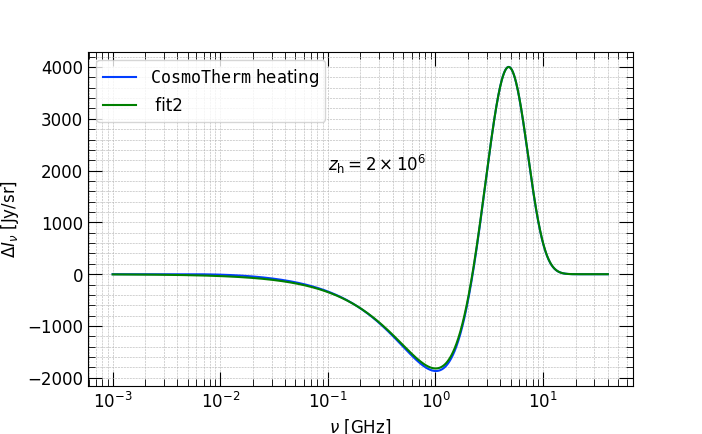

In [27]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")


ax1.plot(x_5e5h,DI_N_5e5h, label = "${\\tt CosmoTherm}$ heating", color= colors1[0])
#ax1.plot(x_5e5c,DI_N_5e5c, label = "${\\tt CosmoTherm}$ ck4", color= colors1[1])

#ax1.plot(x_5e5h,M(x_5e5h)*mu_5e5h, label = " $\mu$ distortion", color = "gray", linestyle = "dashed")
#ax1.plot(x_5e5h,func(x_5e5h,popt[0],popt[1],popt[2]), label = " fit", color = "red")
ax1.plot(x_5e5h,func2(x_5e5h,popt2[0],popt2[1]), label = " fit2", color = "green")


ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 2e1])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")

ax1.set_xlabel("$\\nu$ [GHz]")
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-1,2000, "$z_{\\rm h} = 2 \\times 10^6$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend()   #loc="upper left", bbox_to_anchor=(1.0, 1)

#plt.savefig('outputs/p4p/fhm-5e5.pdf', dpi=300,bbox_inches="tight")
plt.show()

### Try to highlight the presence of G(x)

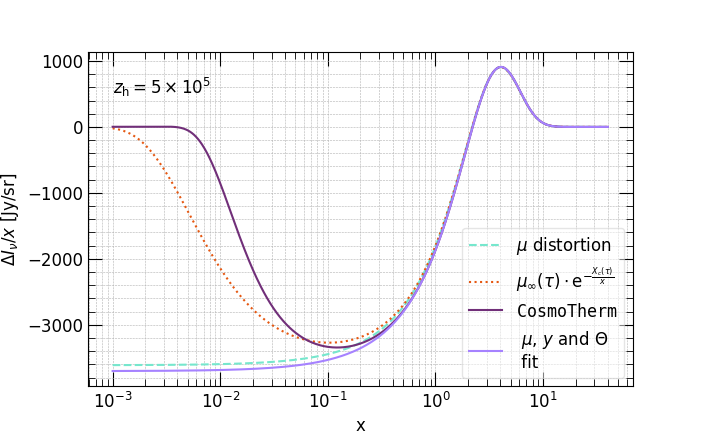

In [33]:
colors1=sns.color_palette("bright",2) 
fig, ax1= plt.subplots( figsize=set_size(width))
#fig.suptitle(f"Approximation whitout the temperature shift ")
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b"]

ax1.plot(x_5e5h,M(x_5e5h)*mu_5e5h/x_5e5h, label = "$\mu$ distortion ", color = colors4[2], linestyle = "dashed")
ax1.plot(x_5e5h,M(x_5e5h)*mu_5e5h/x_5e5h*np.exp(-0.00518185/x_5e5h), label = "$\mu_{\infty}(\\tau) \cdot {\\rm e}^{-\\frac{X_c(\\tau)}{x}}$ ", color = colors4[3], linestyle = "dotted")

#ax1.plot(x_2e6h,M(x_2e6h)*mu_2e6h/x_2e6h, color = "gray", linestyle = "dashed")

ax1.plot(x_5e5h,DI_N_5e5h/x_5e5h, label = "$\\tt CosmoTherm$ ", color= colors4[1])
ax1.plot(x_5e5h, (1.37e-5*M(x_5e5h)+1.63e-9*Y(x_5e5h)-5.96e-8*G(x_5e5h))/x_5e5h, label = " $\mu$, $y$ and $\Theta$ \n fit", color= colors4[0])

#ax1.plot(x_2e6h,DI_N_2e6h/x_2e6h, label = "${\\tt CosmoTherm}$ ck4", color= colors4[1])



#ax1.plot(x_5e5h,func(x_5e5h,popt[0],popt[1],popt[2]), label = " fit", color = "red")
#ax1.plot(x_5e5h,func2(x_5e5h,popt2[0],popt2[1]), label = " fit2", color = "green")


ax1.set_xscale('log')
#ax1.set_xlim([1e-3,1e2])
#ax1.set_ylim([1e-2, 1e2])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}/x$ [Jy/sr]")

#ax1.set_xlabel("$\\nu$ [GHz]")
ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.text(1e-3,500, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
plt.legend(loc='lower right',fancybox=True, framealpha=0.5)  #loc="upper left", bbox_to_anchor=(1.0, 1)

plt.savefig('outputs/p4p/fit.pdf', dpi=300,bbox_inches="tight")
plt.show()